### Predict CO2 Emissions from Vehicles Using Machine Learning 

The Team Members Group 15
1. Dukundimana Toussaint

2. Ziaurrahman Hemat

3. GAI AWUOU KWAI ALIER

4. Abdelrazig Mustafa

#### Importing necessary libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading dataset from Kaggle
link [here](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles?resource=download)



Data Description
Model

4WD/4X4 = Four-wheel drive
AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas

Fuel Consumption

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).


CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

## Loading of data

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data /CO2 Emissions_Canada.csv')
# df.head()

In [3]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## rename Columns

In [5]:
# Rename columns
df.rename(columns={
    'Engine Size(L)': 'Engine_Size_L',
    'Cylinders': 'Cylinders',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb_mpg',
    'CO2 Emissions(g/km)': 'CO2_Emissions_g_km'
}, inplace=True)

In [6]:
# check for missed value
df.isnull().sum()

Make                         0
Model                        0
Vehicle Class                0
Engine_Size_L                0
Cylinders                    0
Transmission                 0
Fuel Type                    0
Fuel_Consumption_City        0
Fuel_Consumption_Hwy         0
Fuel_Consumption_Comb        0
Fuel_Consumption_Comb_mpg    0
CO2_Emissions_g_km           0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

1103

In [8]:
# check for percentage of duplicates in our data
print(f'{df.duplicated().sum() / len(df) * 100:.2f}%')

14.94%


### handling of Duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# check again for duplicates
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [11]:
df.describe(include=[np.number])

,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


The dataset summary provides statistical details of a vehicle dataset with 6,282 entries, focusing on engine size, number of cylinders, fuel consumption, and CO2 emissions:


Engine Size (L): Averages at 3.16 L with a range from 0.9 L to 8.4 L.

Cylinders: Averages 5.62, ranging from 3 to 16.

Fuel Consumption (City, Hwy, Comb in L/100 km): Averages are 12.61 (city), 9.07 (highway), and 11.02 (combined).

Fuel Consumption (Comb mpg): Averages at 27.41 mpg, ranging from 11 to 69 mpg.

CO2 Emissions (g/km): Averages at 251.16 g/km, with a range from 96 to 522 g/km.
Overall, the data captures a wide range of vehicle performance and emissions characteristics

In [12]:
# Selecting only object (categorical) columns
object_columns_df = df.select_dtypes(include=[object])

# Display the first few rows of the object columns
object_columns_df.head()

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [13]:
# checking unique number of objet values
for col in object_columns_df.columns:
    unique_values = object_columns_df[col].unique()
    num_unique = len(unique_values)
    print(f'Column: {col}')
    print(f'Number of Unique Values: {num_unique}')
    print(f'Unique Values: {unique_values}')
    print('-' * 50)

Column: Make
Number of Unique Values: 42
Unique Values: ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
--------------------------------------------------
Column: Model
Number of Unique Values: 2053
Unique Values: ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
--------------------------------------------------
Column: Vehicle Class
Number of Unique Values: 16
Unique Values: ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN

Vehicle Column have many unique values of 16 , Transimssion Column have also many Unique values of 27 , Make has so many 42  and Model has unique values of  2053 may require feature engineering to transform its categorical data into numerical representations suitable for Modelling Process.

### Distribution of Numeric data

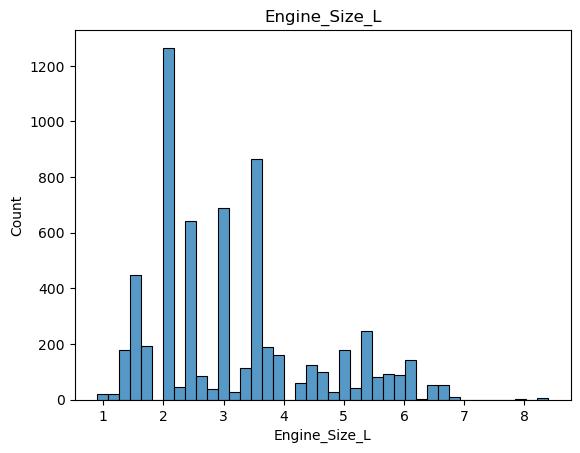

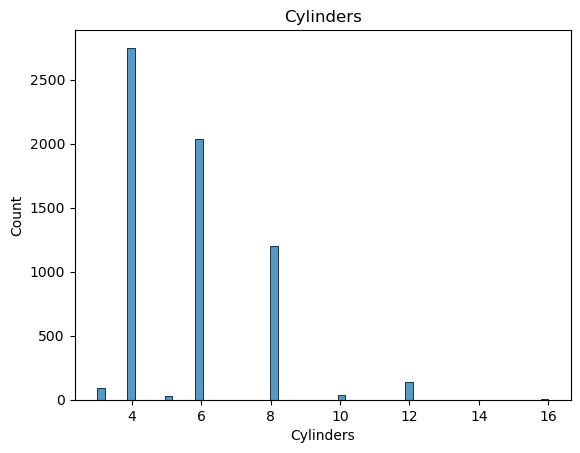

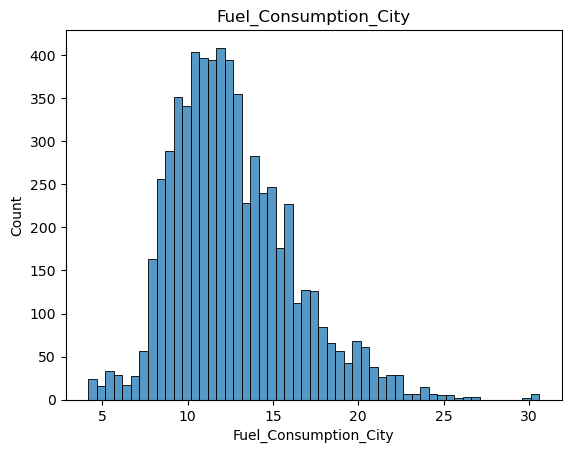

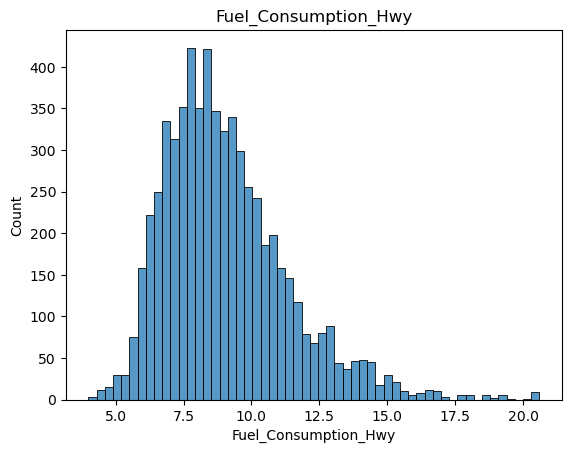

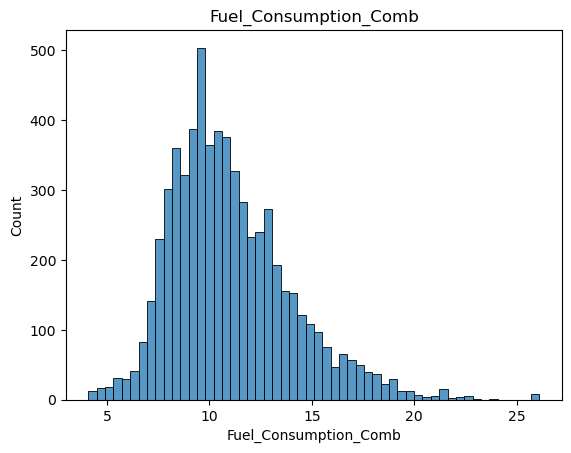

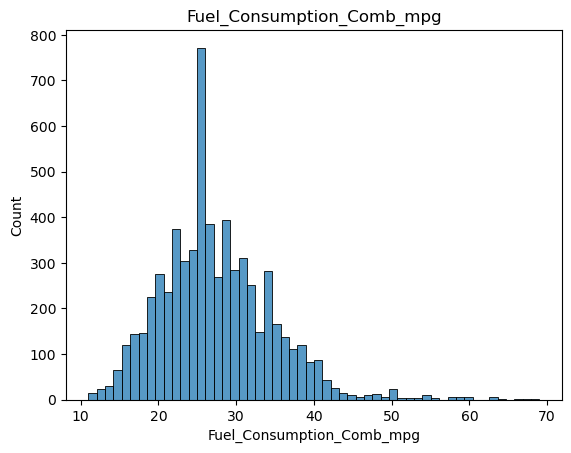

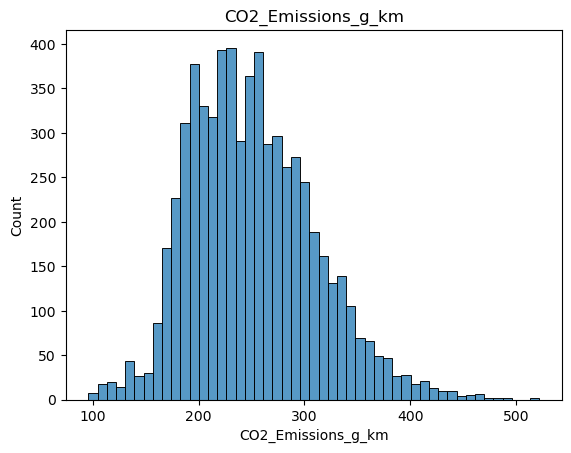

In [14]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create histograms for each numerical column
for col in numerical_cols:
  sns.histplot(df[col])
  plt.title(col)
  plt.show()

These Histgrom show the Distribution and Most features are tends to be Normal distributed except Engine_size_L and Cylinders which may require to be Normalized to contribute  equally and efficient  in Modeling Process

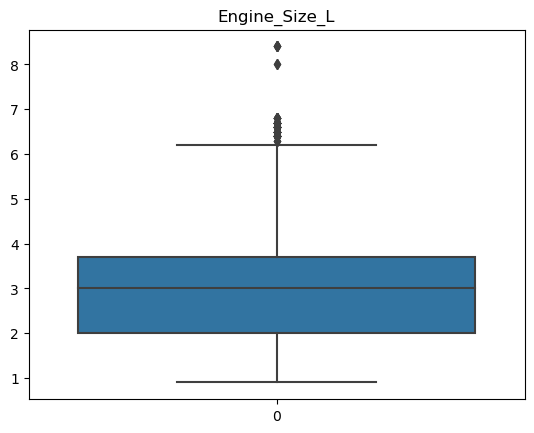

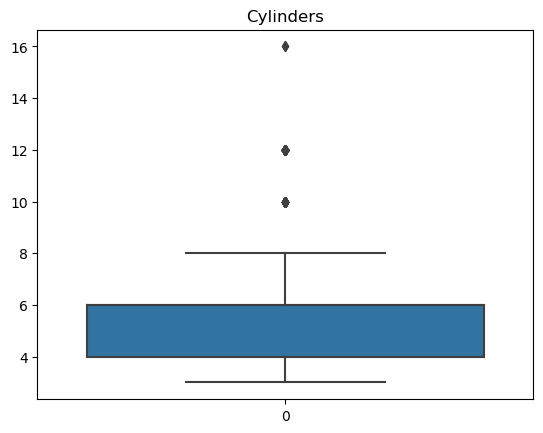

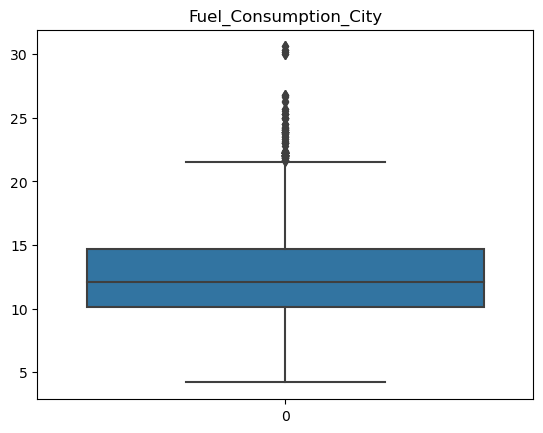

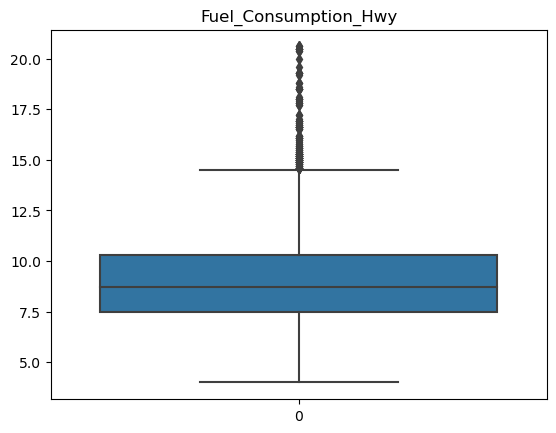

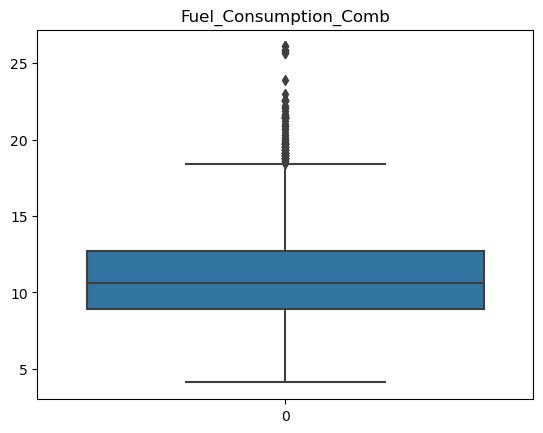

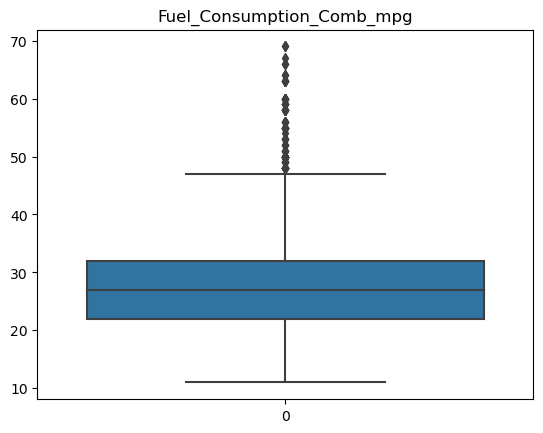

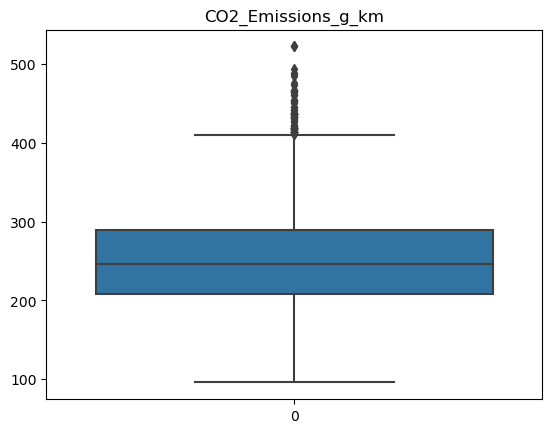

In [15]:
# checking of outliers
for col in numerical_cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

### Remove of Outlirers

In [16]:
# remove of outliers
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

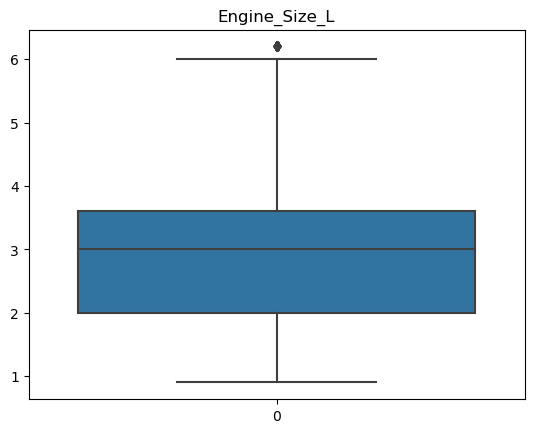

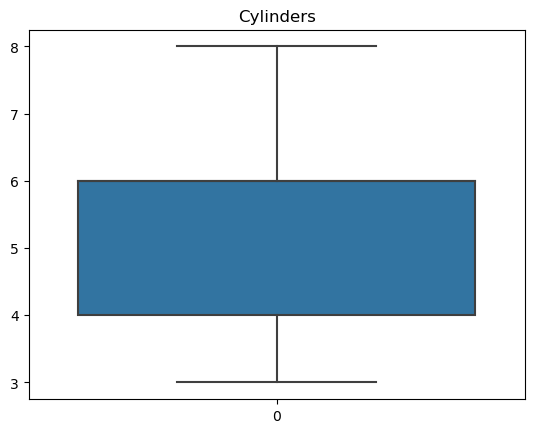

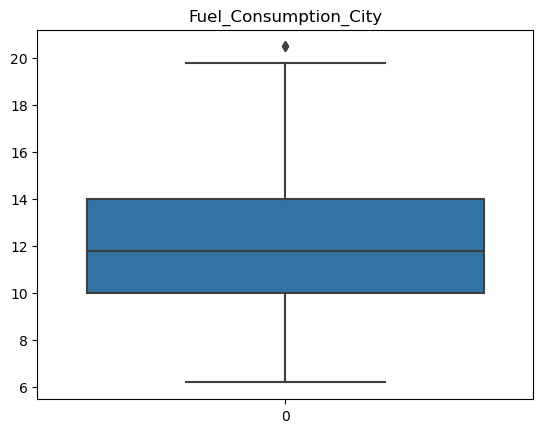

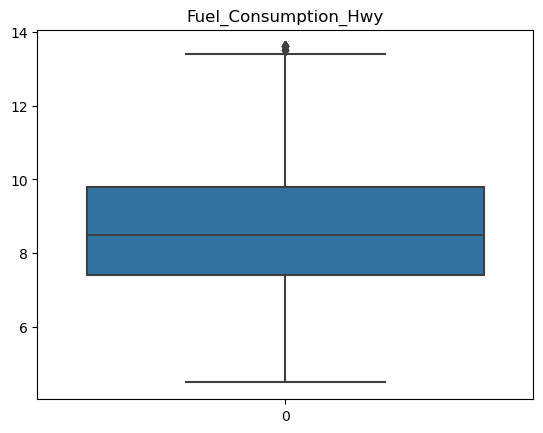

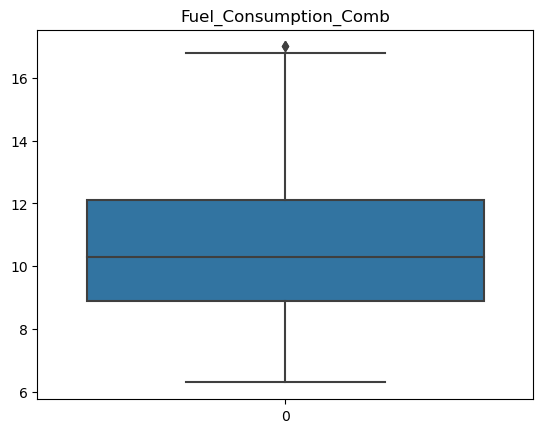

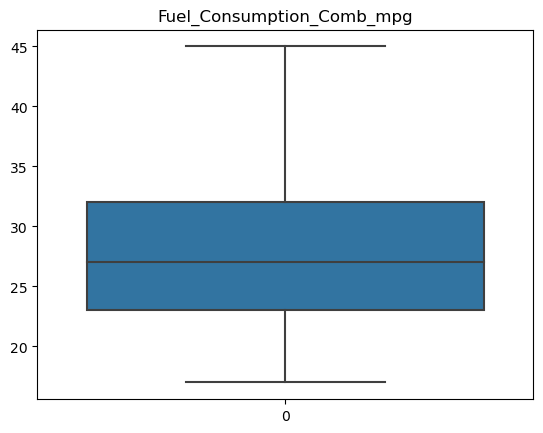

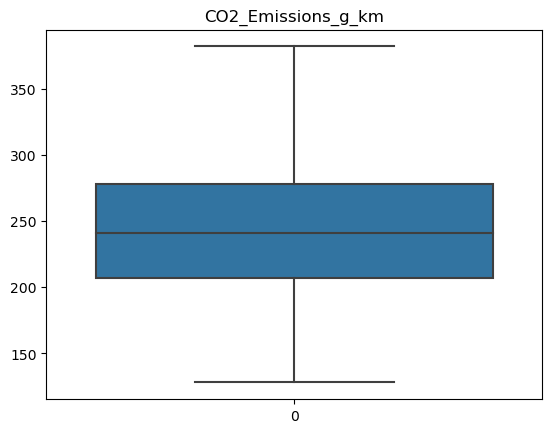

In [17]:
# check agin of the outliers
for col in numerical_cols:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

### Correlation

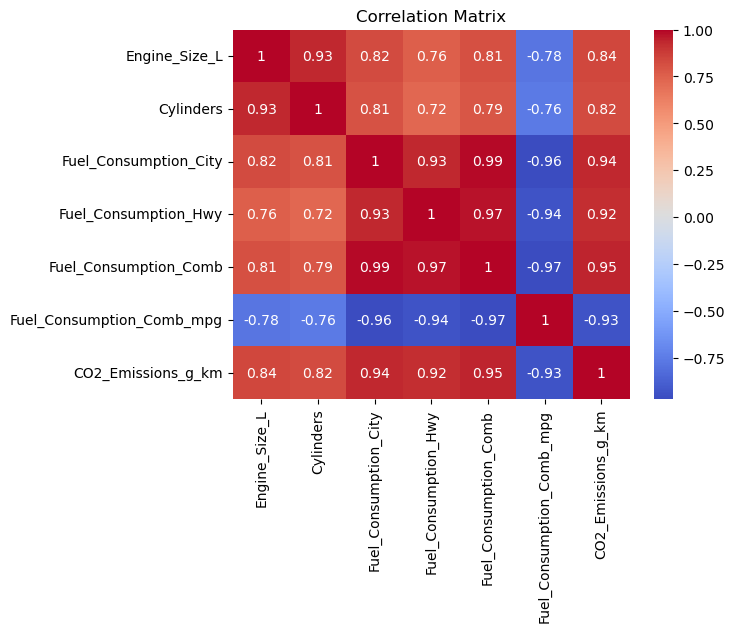

In [18]:
# Calculate correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Fuel_Consumption_Comb1 shows a strong negative correlation (less than -0.9) with CO2_Emissions, Fuel_Consumption_Comb, and Fuel_Consumption_City. CO2_Emissions exhibits a strong positive correlation (greater than 0.9) with both Fuel_Consumption_Comb and Fuel_Consumption_City.

#### Analysis of Categorical data

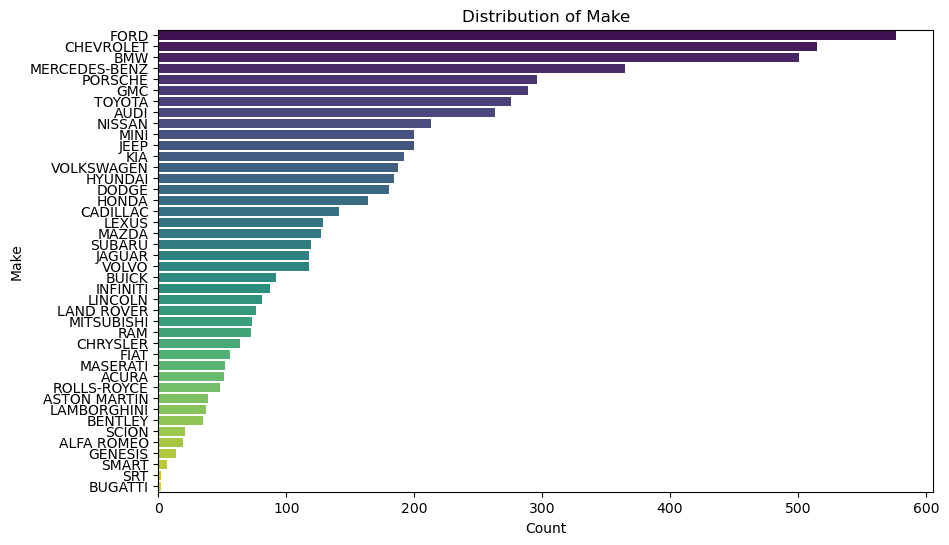

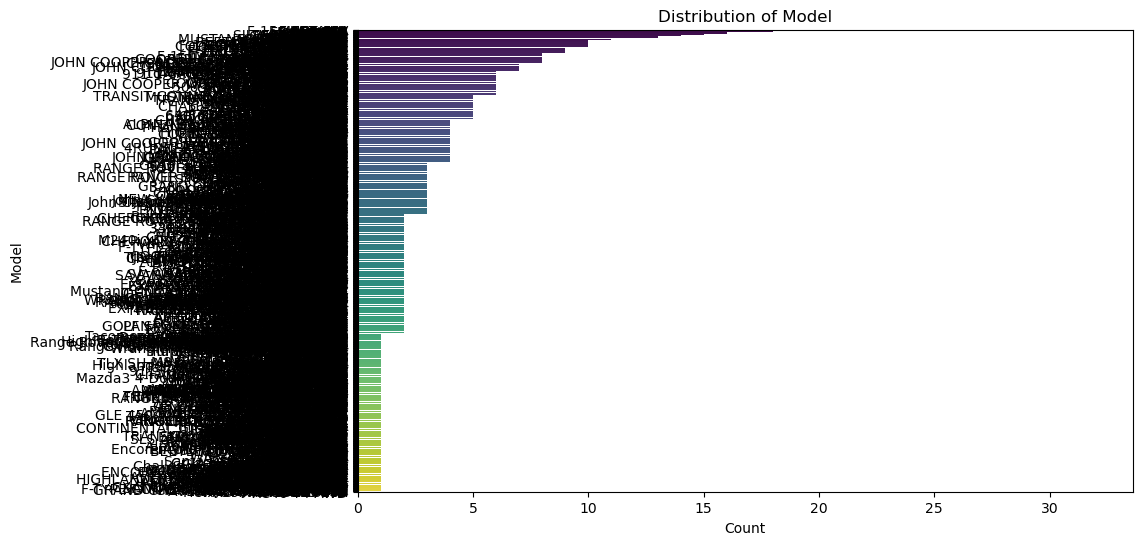

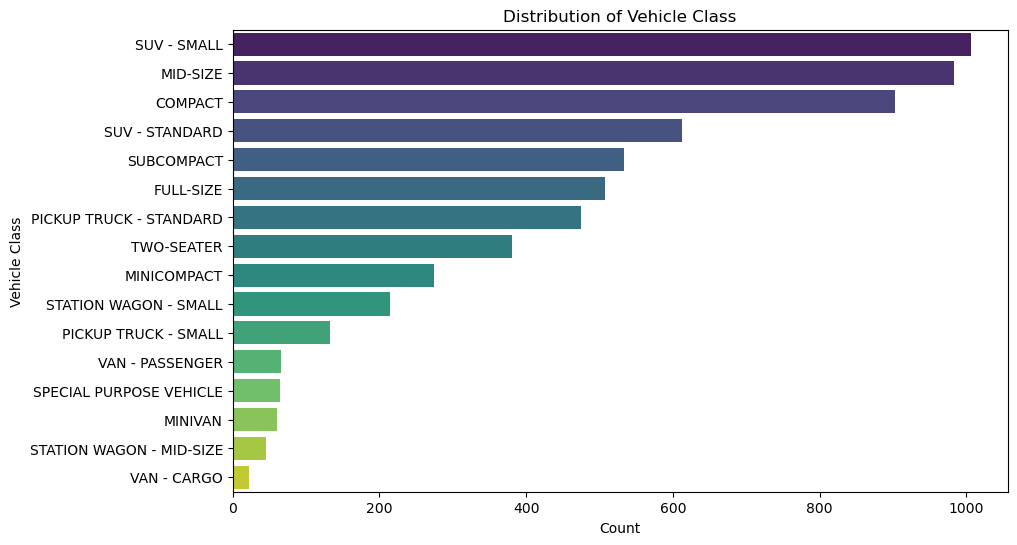

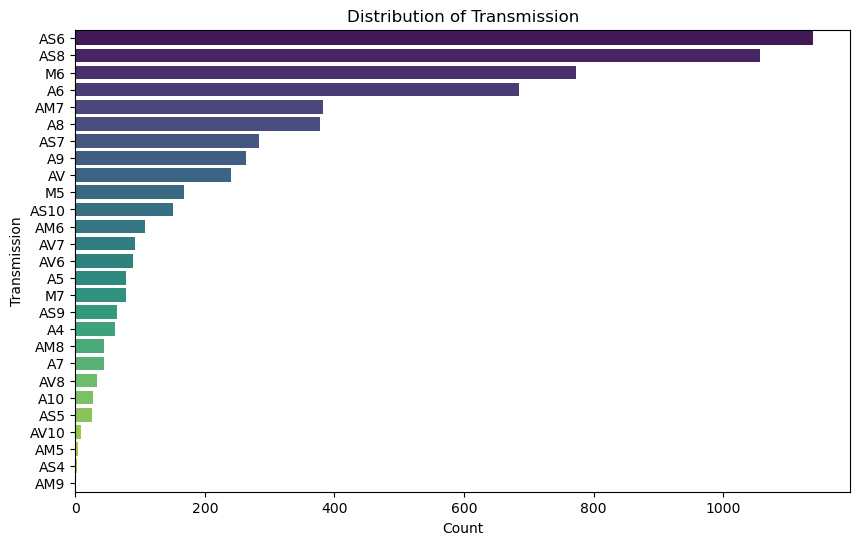

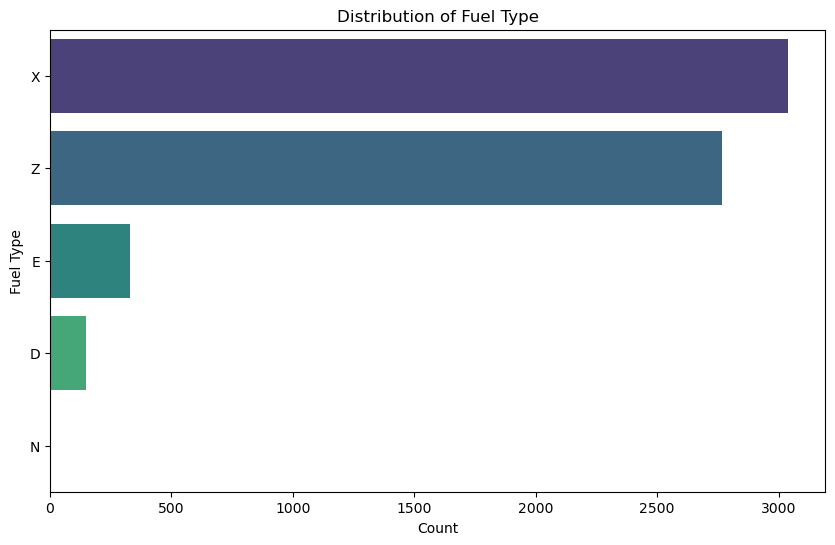

In [19]:
# visualize the object columns
for col in object_columns_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=object_columns_df, y=col, order=object_columns_df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

 as see above we have many unique values  ,
  we need feature engineering To streamline the modeling process, it is essential to simplify the categorical data by converting it into numerical format. This transformation will facilitate easier encoding and prepare the data effectively for modeling.

 ## Feature Engineering

1. ### Grouping Car Brands as make type

The goal is to reduce the complexity of the categorical variable by consolidating similar types into fewer groups, making it easier to handle in the modeling process. Here’s a breakdown of the rationale behind this transformation:

- **Sports Category**:  
  Brands like **BUGATTI**, **PORSCHE**, **MASERATI**, **ASTON MARTIN**, **LAMBORGHINI**, **JAGUAR**, and **SRT** are known for their high-performance sports cars. They are categorized under "Sports" due to their focus on speed, luxury, and exclusivity.

- **Premium Category**:  
  Brands such as **ALFA ROMEO**, **AUDI**, **BMW**, **BUICK**, **CADILLAC**, **CHRYSLER**, **DODGE**, **GMC**, **INFINITI**, **JEEP**, **LAND ROVER**, **LEXUS**, **MERCEDES-BENZ**, **MINI**, **SMART**, and **VOLVO** are positioned as premium brands. They offer a balance of luxury, performance, and advanced technology, targeting a higher-end market compared to general consumer brands.

- **Luxury Category**:  
  **ACURA**, **BENTLEY**, **LINCOLN**, **ROLLS-ROYCE**, and **GENESIS** are categorized as "Luxury" due to their focus on superior quality, craftsmanship, and exclusive features. These brands cater to the luxury segment of the market, often emphasizing comfort and status.

- **General Category**:  
  Brands like **CHEVROLET**, **FIAT**, **FORD**, **KIA**, **HONDA**, **HYUNDAI**, **MAZDA**, **MITSUBISHI**, **NISSAN**, **RAM**, **SCION**, **SUBARU**, **TOYOTA**, and **VOLKSWAGEN** are grouped as "General" because they primarily target the mass market with a wide range of affordable, reliable vehicles.


In [20]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR', 'SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                           'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ', 'MINI', 'SMART', 'VOLVO'], 'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE', 'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                           'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN'], 'General')

In [21]:
# drop of make columns
df.drop('Make', axis=1, inplace=True)


<module 'matplotlib.pyplot' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

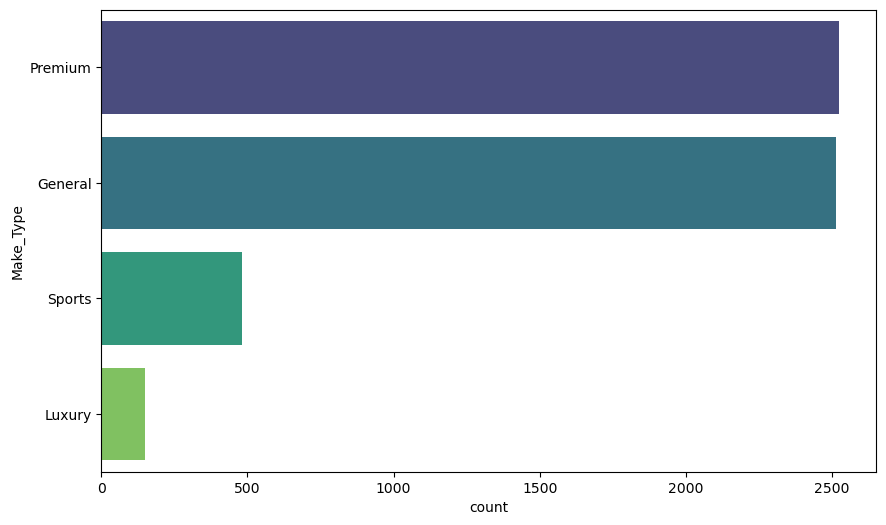

In [22]:
# visualize the make type column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Make_Type', order=df['Make_Type'].value_counts().index, palette='viridis')
plt

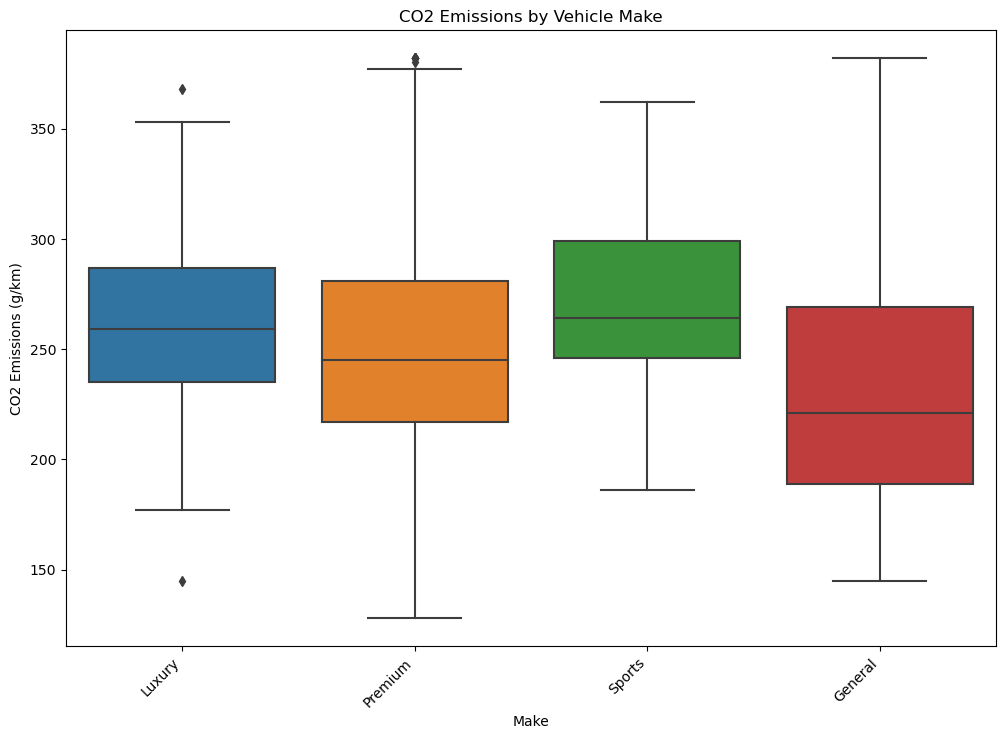

In [23]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Make_Type', y='CO2_Emissions_g_km', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions by Vehicle Make')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

This shows that Luxury and Sports cars emit alot of  C02 emissions

Reasoning of transform vehicle class:

**The primary goal of this feature engineering** is to reduce the dimensionality and complexity of the 'Vehicle Class' column. By grouping similar vehicle types into broader categories, we can:

**Simplify the model**: A model with fewer distinct categories is often easier to train and interpret.
Improve generalization: By combining similar classes, we can reduce the risk of overfitting, leading to better performance on unseen data.

**some Reference**:Environmental Protection Agency (EPA): The EPA's fuel economy data often includes vehicle classifications

In [24]:
# Replacing 'Vehicle Class' column values with corresponding 'Vehicle_Class_Type' categories in the DataFrame df
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'], 'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'], 'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')


In [25]:
# drop vehicle class column
df.drop('Vehicle Class', axis=1, inplace=True)

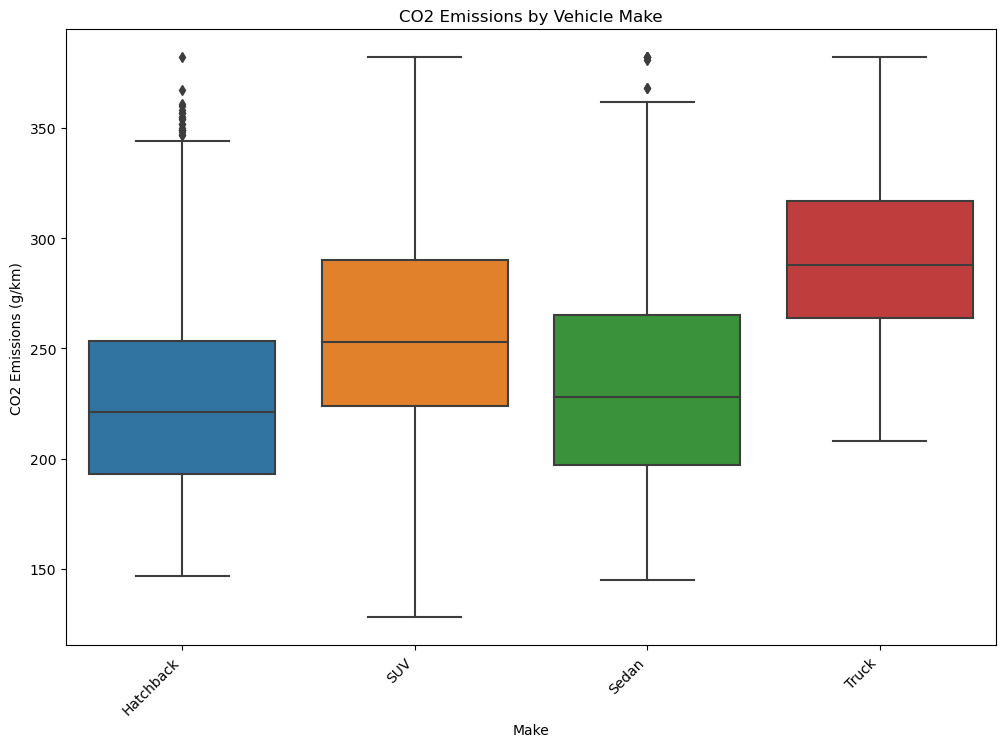

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vehicle_Class_Type', y='CO2_Emissions_g_km', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('CO2 Emissions by Vehicle Make')
plt.xlabel('Make')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

This Vehicle type show that Truck Emit a lot Co2 Emissions

## Transforming the Categorical into Numerical value

In [27]:
# Generating dummy variables for categorical features in the DataFrame df
df_dummies = pd.get_dummies(data=df[["Fuel Type", "Transmission", "Make_Type", "Vehicle_Class_Type"]], drop_first=True)

# Selecting numerical features from the DataFrame df
df_num_features = df.select_dtypes(include=np.number)

# Concatenating the dummy variables with the numerical features
df = pd.concat([df_num_features, df_dummies], axis=1)

## Correlation of Dependaent variable to Target variable

In [28]:
# Calculate correlations with the target variable
correlations = df_num_features.corr()['CO2_Emissions_g_km']

# Remove the correlation of the target variable with itself
correlations = correlations.drop('CO2_Emissions_g_km')

# Print the correlations
print(correlations)


Engine_Size_L                0.838778
Cylinders                    0.823292
Fuel_Consumption_City        0.935897
Fuel_Consumption_Hwy         0.920310
Fuel_Consumption_Comb        0.945572
Fuel_Consumption_Comb_mpg   -0.934560
Name: CO2_Emissions_g_km, dtype: float64


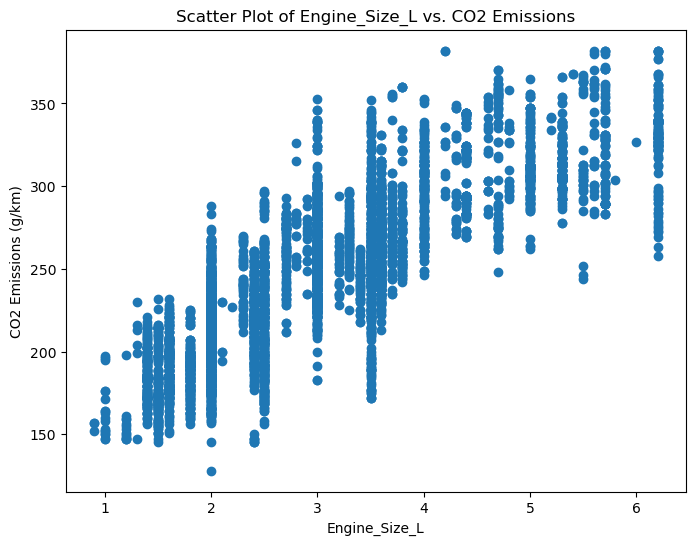

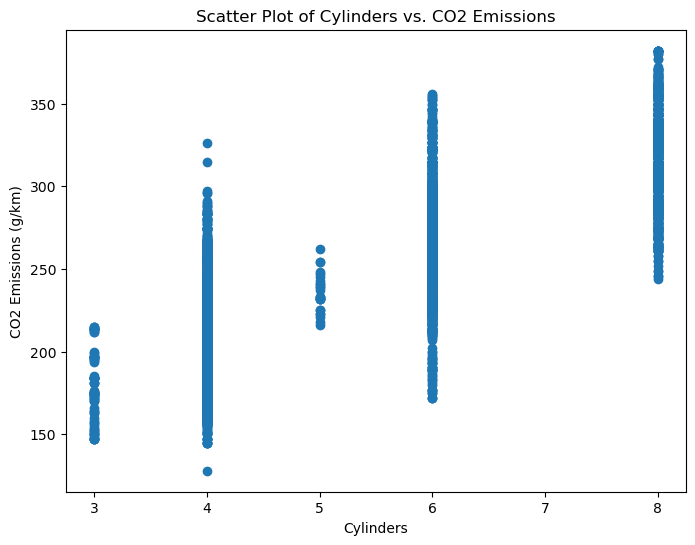

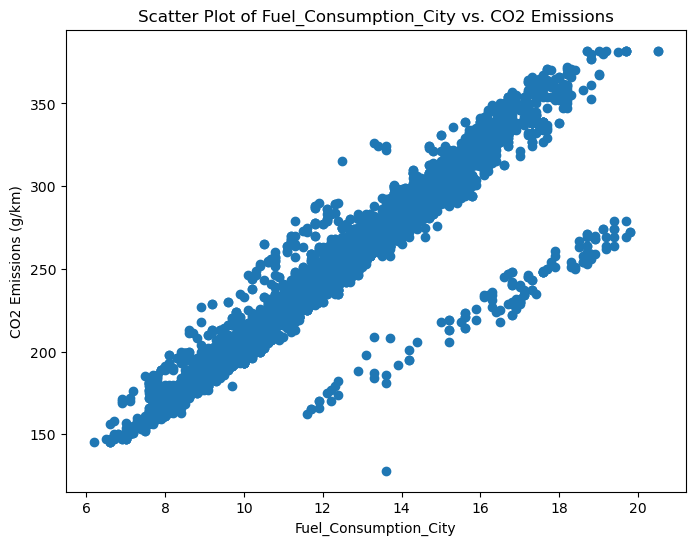

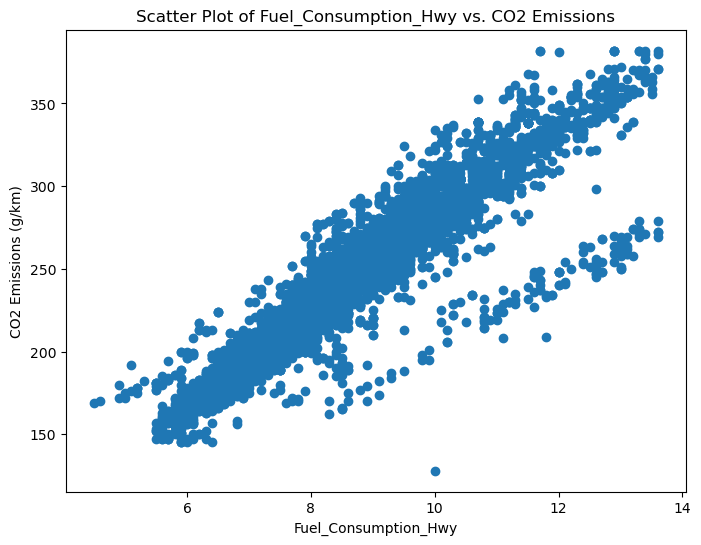

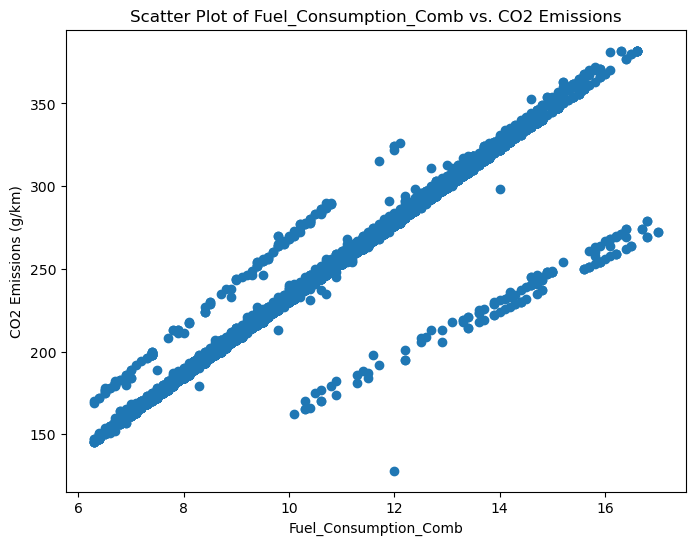

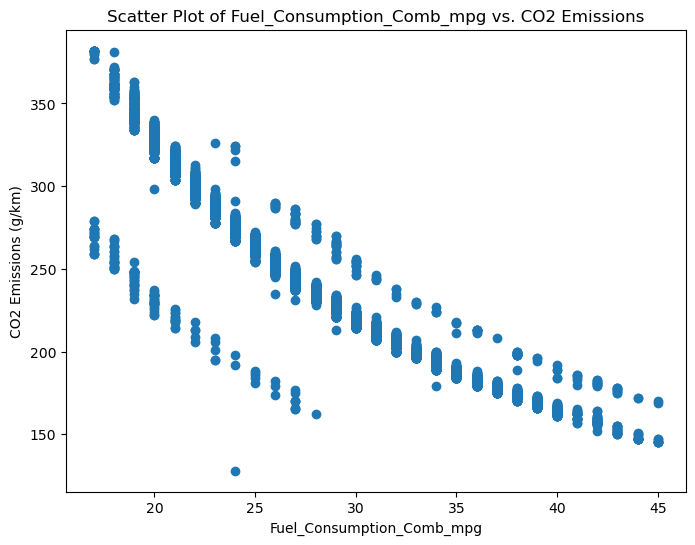

In [29]:
for feature in df_num_features.columns:
    if feature != 'CO2_Emissions_g_km':
        plt.figure(figsize=(8, 6))
        plt.scatter(df_num_features[feature], df_num_features['CO2_Emissions_g_km'])
        plt.title(f'Scatter Plot of {feature} vs. CO2 Emissions')
        plt.xlabel(feature)
        plt.ylabel('CO2 Emissions (g/km)')
        plt.show()

In [30]:
df.head()

,Engine_Size_L,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb_mpg,CO2_Emissions_g_km,Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,True,False,True,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,True,False,False,True,False,False
5,3.5,6,11.9,7.7,10.0,28,230,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670 entries, 0 to 7384
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine_Size_L              5670 non-null   float64
 1   Cylinders                  5670 non-null   int64  
 2   Fuel_Consumption_City      5670 non-null   float64
 3   Fuel_Consumption_Hwy       5670 non-null   float64
 4   Fuel_Consumption_Comb      5670 non-null   float64
 5   Fuel_Consumption_Comb_mpg  5670 non-null   int64  
 6   CO2_Emissions_g_km         5670 non-null   int64  
 7   Fuel Type_E                5670 non-null   bool   
 8   Fuel Type_N                5670 non-null   bool   
 9   Fuel Type_X                5670 non-null   bool   
 10  Fuel Type_Z                5670 non-null   bool   
 11  Transmission_A4            5670 non-null   bool   
 12  Transmission_A5            5670 non-null   bool   
 13  Transmission_A6            5670 non-null   bool   
 1

In [32]:
# change bool column dtype into integer type
for col in df.select_dtypes(include=['bool']):
    df[col] = df[col].astype(int)

In [33]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5670 entries, 0 to 7384
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Engine_Size_L              5670 non-null   float64
 1   Cylinders                  5670 non-null   int64  
 2   Fuel_Consumption_City      5670 non-null   float64
 3   Fuel_Consumption_Hwy       5670 non-null   float64
 4   Fuel_Consumption_Comb      5670 non-null   float64
 5   Fuel_Consumption_Comb_mpg  5670 non-null   int64  
 6   CO2_Emissions_g_km         5670 non-null   int64  
 7   Fuel Type_E                5670 non-null   int32  
 8   Fuel Type_N                5670 non-null   int32  
 9   Fuel Type_X                5670 non-null   int32  
 10  Fuel Type_Z                5670 non-null   int32  
 11  Transmission_A4            5670 non-null   int32  
 12  Transmission_A5            5670 non-null   int32  
 13  Transmission_A6            5670 non-null   int32  
 1

### Modeling Process

Importing neccesary Libaries of Scikit Learn

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

Splitting the data into  Independent(X)   and  Dependent Variables(target Variables)(Y)

In [59]:
# split up data
X = df.drop('CO2_Emissions_g_km', axis=1)
y = df['CO2_Emissions_g_km']

In [60]:
X.shape,y.shape

((5670, 42), (5670,))

Scaling Data  for equal Contribution  in Modelling Process

In [61]:
# Normalization of the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [62]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [63]:
# fit and train data
lreg = LinearRegression()
lreg.fit(X_train, y_train)


LinearRegression()

In [64]:
# predict and evaluate
y_pred = lreg.predict(X_test)

In [71]:
# evaluate  and display
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error for Linear reg (MSE): {mse:.2f}")
print(f"Mean Absolute Error  Linear reg (MAE): {mae:.2f}")
print(f"R-squared (R2) Linear reg: {r2:.2f}")

Mean Squared Error for Linear reg (MSE): 10.03
Mean Absolute Error  Linear reg (MAE): 2.25
R-squared (R2) Linear reg: 1.00


In [66]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df

,Actual,Predicted
4190,315,312.590452
4820,298,295.625298
2309,283,281.901109
3098,249,247.001204
2084,216,219.841184
...,...,...
54,308,313.003155
4584,254,252.163380
6233,215,214.938121
1586,175,177.014377


In [67]:
display(mse, mae, r2)

10.029296961108047

2.2452127554574473

0.9956070357851592

Ridge 

In [68]:
# fit and train ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# predict and evaluate
y_pred_ridge = ridge.predict(X_test)

In [74]:
# evaluate  and display
mse = mean_squared_error(y_test, y_pred_ridge )
mae = mean_absolute_error(y_test, y_pred_ridge )
r2 = r2_score(y_test, y_pred_ridge )

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 10.15
Mean Absolute Error (MAE): 2.29
R-squared (R2): 1.00


In [75]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_ridge })
comparison_df

,Actual,Predicted
4190,315,313.000074
4820,298,296.718041
2309,283,282.367523
3098,249,247.182070
2084,216,220.020947
...,...,...
54,308,313.076561
4584,254,252.324655
6233,215,214.498041
1586,175,177.115317


Since means both Linear and Ridge Regression have R2 of 1   show that models perfectly explain the variance in the target variable, which is often an indication of overfitting if the dataset is not extremely well-behaved or if this is on training data.

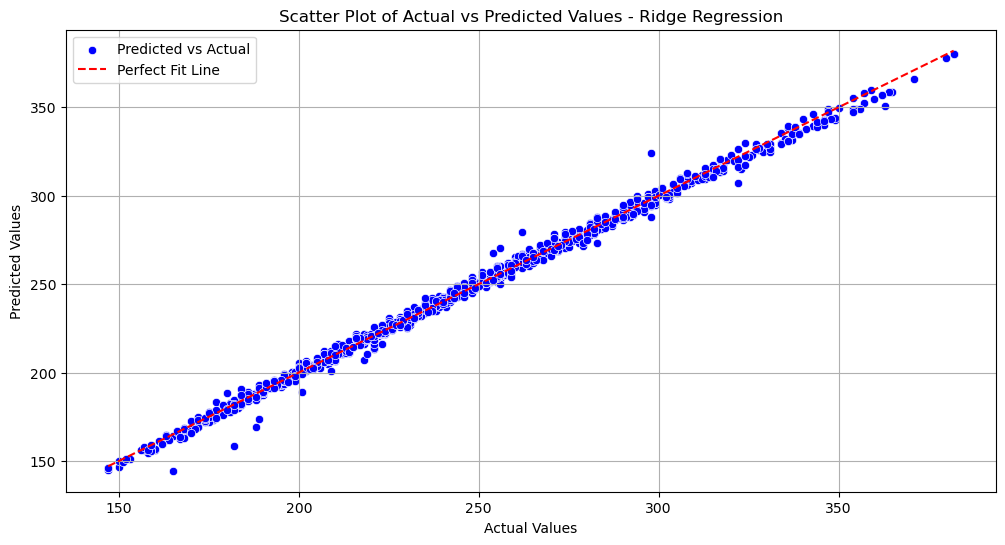

In [76]:
# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

##### Cross Validation and Hyper parameter Tunning

Cross-validation includes resampling and sample splitting methods that use different portions of the data to test and train a model on different iterations.

a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting
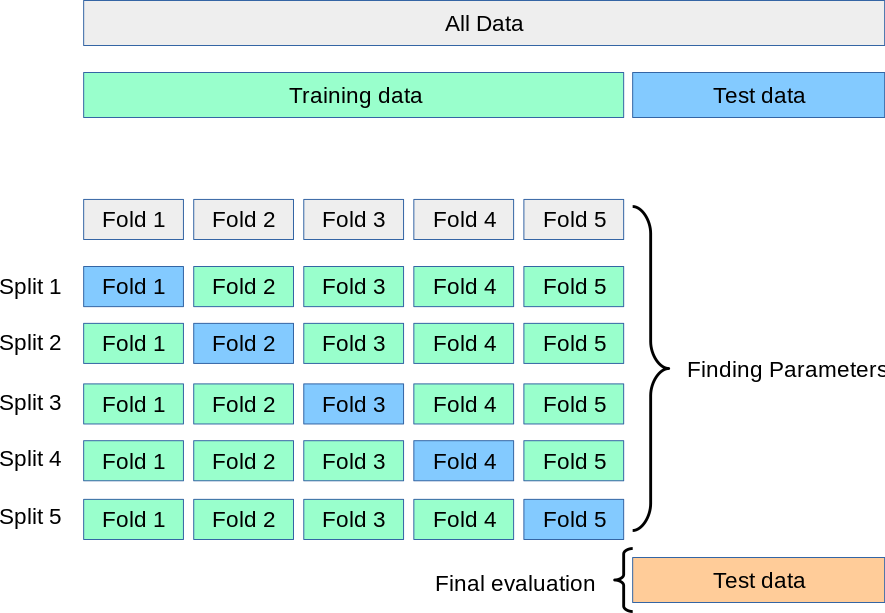

We are using **KFOLD Cross Validation**


**Hyperparameter tuning** is the process of selecting the optimal set of hyperparameters for a machine learning model. It is an important step in the model development process, as the choice of hyperparameters can have a significant impact on the model's performance.


In [77]:
# Define cross-validation strategy: 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Ridge model with a pipeline for scaling
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Scale the features
    ('ridge', Ridge())  # Ridge regression model
])

# Define hyperparameters for Ridge regression
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
}

# Perform GridSearchCV with Ridge regression
ridge_grid = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error')
ridge_grid.fit(X, y)

# Display the best parameters and scores
print(f'Best Ridge Parameters: {ridge_grid.best_params_}')
print(f'Best Ridge MSE (Cross-Validated): {-ridge_grid.best_score_}')

Best Ridge Parameters: {'ridge__alpha': 0.1}
Best Ridge MSE (Cross-Validated): 12.84001808164113


In [78]:
# Evaluate the best model on the entire dataset
best_ridge = ridge_grid.best_estimator_
y_pred = best_ridge.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Ridge MSE: {mse}')
print(f'Ridge MAE: {mae}')
print(f'Ridge R2: {r2}')

# Cross-validation scores for the best model
cv_scores = cross_val_score(best_ridge, X, y, cv=kf, scoring='neg_mean_squared_error')

# Display Cross-Validation scores
print(f'Cross-Validation MSE Scores: {-cv_scores}')
print(f'Average Cross-Validation MSE: {-cv_scores.mean()}')

Ridge MSE: 10.441303437796238
Ridge MAE: 2.2451893575509745
Ridge R2: 0.9956174847622519
Cross-Validation MSE Scores: [10.00222975  8.16941065 12.60575562 22.60720946 10.81548494]
Average Cross-Validation MSE: 12.84001808164113


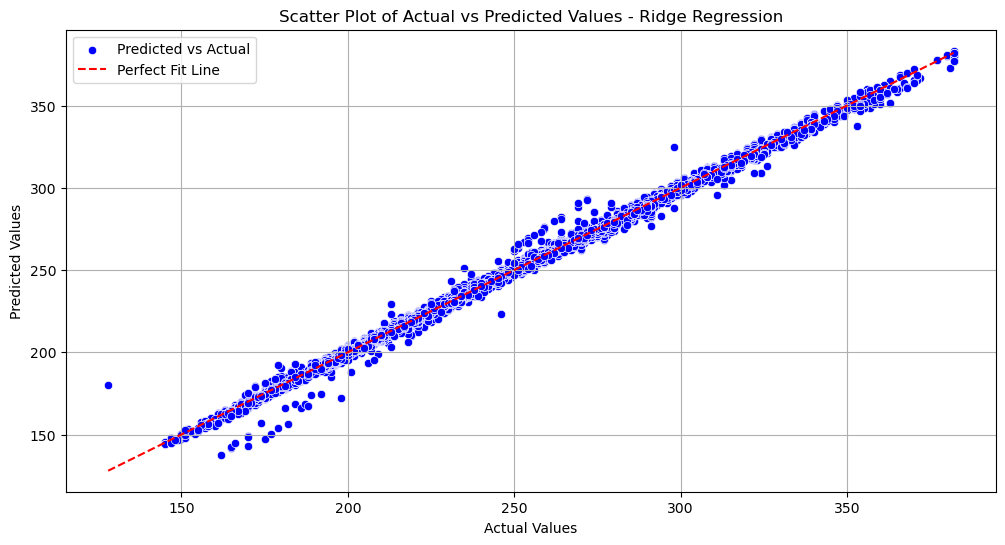

In [80]:
# Scatter Plot of Actual vs Predicted values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs Predicted Values - Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# comparison of actual and predicted value
comparison_df = pd.DataFrame({
    'Actual': y,
    'Predicted': y_pred
})

comparison_df.head()

,Actual,Predicted
0,196,195.328568
1,221,224.541513
3,255,258.683972
4,244,246.656902
5,230,233.302251


To Compare The Best Model Use Between  Ridge Model  and  Best Ridge Model (After Hyperparameter Tuning with alpha=0.1)

 the tuned model showed an average MSE of 12.84, demonstrating how the model performs across multiple folds of data, reflecting its generalization capability.
 If consistency and avoiding overfitting are priorities, especially for deployment, the tuned Ridge model (alpha=0.1) is the better choice despite its slightly lower R² score on the entire dataset

Saving Model for Depolyment 

In [85]:

# Save the trained model using joblib
import joblib

joblib_filename = 'best_ridge.pkl'
joblib.dump(best_ridge, joblib_filename)
print(f'Model saved as {joblib_filename}')

Model saved as best_ridge.pkl
